In [1]:
from utils import ModelImporter, Preprocessing, Metrics
import torch
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from image_utils import ImageConverter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

# Analize Model with the Public Test Data

In [3]:
#load data
pre = Preprocessing('fer2013')
pre.load_data(filename='test_public_norm.csv.gz', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [ ]:
#transform data
test_pixels = pre.get(name='test').drop(columns=['emotion'])
test_pixel_np = test_pixels.values
test_pixel_224_np = np.zeros(shape=[test_pixels.shape[0], 224 * 224])
for i in range(test_pixel_np.shape[0]):
    image = test_pixel_np[i].reshape(48, 48)
    newimg = img_conv.upscale(image)
    test_pixel_224_np[i] = newimg.reshape(1, 224 * 224)

In [4]:
dtype = torch.float
device = torch.device("cpu")

n_classes = 7
n_epochs = 100
learning_rate = 0.001
batch_size = 64

loss_ep_n = 15
acc_ep_n = 85
f1_ep_n = 85
bs_ep_n = 85

m_importer = ModelImporter('fer2013_DatasetD')

In [5]:
model_name = f'cnn_VGG16_pretrained_A_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{acc_ep_n}'
model = m_importer.load_nn_model(model_name)

['cnn_multi5_layer_D_bs_0.001_64_100_7', 1, 7, [48, 48], 64, 128, 256, 128, 64, 2]
load model CnnMulti5Layer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 64, kernel_size=(3

In [6]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [7]:
y_pred_prob = None
with torch.no_grad():
    y_pred_prob = model(X_test)
y_pred = y_pred_prob.argmax(1)
accuracy_soft = (y_pred == y_test).float().mean()
accuracy_soft

tensor(0.6258)

In [8]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
labels_num = [0, 1, 2, 3, 4, 5, 6]
metrics = Metrics(y_test, y_pred, labels_num, labels)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

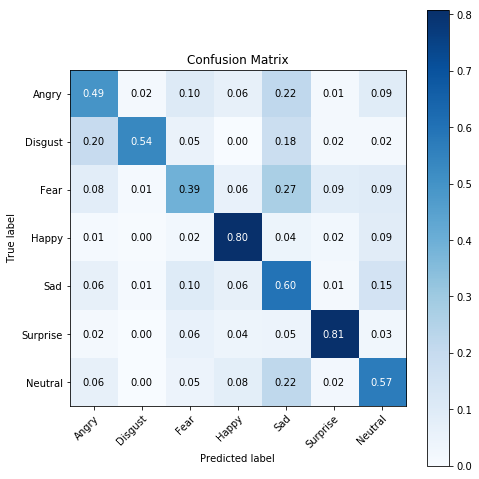

In [9]:
metrics.represent_cm()

In [10]:
metrics.balanced_score()

0.5999768886153054

In [11]:
pre.load_data(filename='test_private_norm.csv.gz', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [12]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [13]:
y_pred_prob = None
with torch.no_grad():
    y_pred_prob = model(X_test)
y_pred = y_pred_prob.argmax(1)
accuracy_soft = (y_pred == y_test).float().mean()
del model
accuracy_soft

tensor(0.6305)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

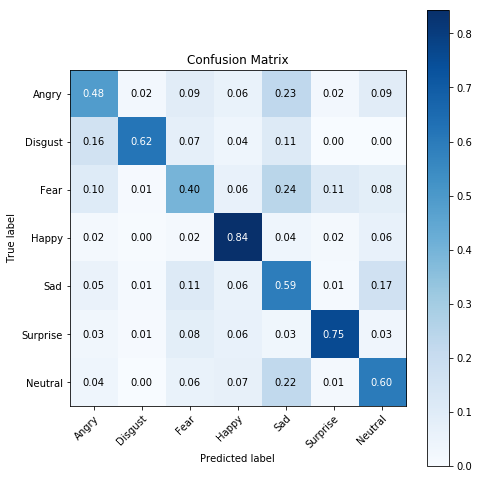

In [14]:
metrics = Metrics(y_test, y_pred, labels_num, labels)
metrics.represent_cm()

In [15]:
metrics.balanced_score()

0.61262798165114

In [16]:
del X_test, X_df, y_test, y_df

In [73]:
def pretty_size(size):
	"""Pretty prints a torch.Size object"""
	assert(isinstance(size, torch.Size))
	return " × ".join(map(str, size))

def dump_tensors(gpu_only=True):
	"""Prints a list of the Tensors being tracked by the garbage collector."""
	import gc
	total_size = 0
	for obj in gc.get_objects():
		try:
			if torch.is_tensor(obj):
				if not gpu_only or obj.is_cuda:
					print("%s:%s%s %s" % (type(obj).__name__, 
										  " GPU" if obj.is_cuda else "",
										  " pinned" if obj.is_pinned else "",
										  pretty_size(obj.size())))
					total_size += obj.numel()
			elif hasattr(obj, "data") and torch.is_tensor(obj.data):
				if not gpu_only or obj.is_cuda:
					print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, 
												   type(obj.data).__name__, 
												   " GPU" if obj.is_cuda else "",
												   " pinned" if obj.data.is_pinned else "",
												   " grad" if obj.requires_grad else "", 
												   " volatile" if obj.volatile else "",
												   pretty_size(obj.data.size())))
					total_size += obj.data.numel()
		except Exception as e:
			pass        
	print("Total size:", total_size)

In [74]:
dump_tensors(gpu_only = False)

Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 3589 × 1 × 48 × 48
Tensor: pinned 3589
Tensor: pinned 
Tensor: pinned 
Tensor: pinned 3589 × 7
Tensor: pinned 3589
Tensor: pinned 
Total size: 8301369


/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Index.data is deprecated and will be removed in a future version
/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: RangeIndex.data is deprecated and will be removed in a future version
/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Series.data is deprecated and will be removed in a future version
